In [ ]:
!pip install yfinance

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

import yfinance as yf

In [ ]:

stock_symbol = "AAPL"

df = yf.download(stock_symbol, start="2015-01-01", end="2024-01-01")
df.head()

/tmp/ipython-input-2436091589.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(stock_symbol, start="2015-01-01", end="2024-01-01")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-01-02,24.237555,24.705324,23.798604,24.694239,212818400
2015-01-05,23.554741,24.086801,23.368521,24.006992,257142000
2015-01-06,23.556961,23.816340,23.195602,23.619034,263188400
2015-01-07,23.887281,23.987042,23.654504,23.765350,160423600
2015-01-08,24.805086,24.862726,24.097889,24.215387,237458000


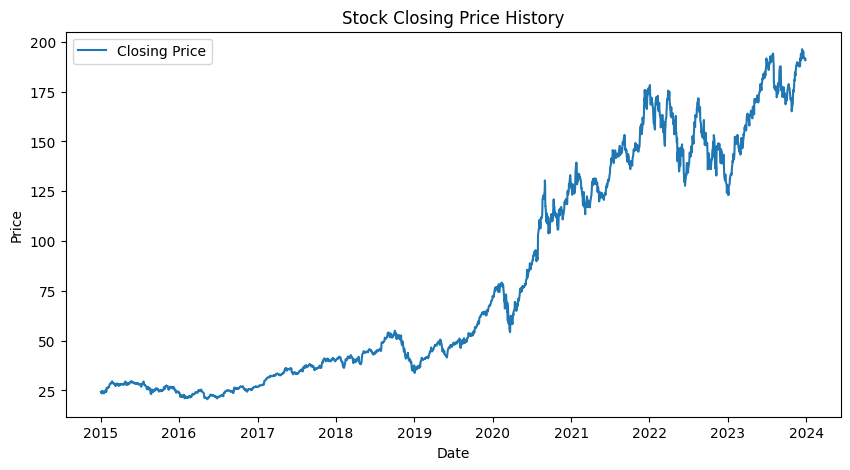

In [ ]:
data = df[['Close']]
plt.figure(figsize=(10,5))
plt.plot(data, label='Closing Price')
plt.title("Stock Closing Price History")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data)

In [ ]:
def create_dataset(dataset, time_step=60):
    X, y = [], []
    for i in range(time_step, len(dataset)):
        X.append(dataset[i-time_step:i, 0])
        y.append(dataset[i, 0])
    return np.array(X), np.array(y)

time_step = 60
X, y = create_dataset(scaled_data, time_step)

In [ ]:
train_size = int(len(X) * 0.8)

X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [ ]:
model = Sequential()

model.add(LSTM(50, return_sequences=True, input_shape=(60,1)))
model.add(Dropout(0.2))

model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(50))
model.add(Dropout(0.2))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.fit(X_train, y_train, epochs=20, batch_size=32)

Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 8s 70ms/step - loss: 0.0264
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 6s 86ms/step - loss: 0.0020
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - loss: 0.0016
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - loss: 0.0015
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 83ms/step - loss: 0.0015
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - loss: 0.0016
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - loss: 0.0016
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 89ms/step - loss: 0.0019
Epoch 9/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - loss: 0.0014
Epoch 10/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 75ms/step - loss: 0.0014
Epoch 11/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 80ms/step - loss: 0.0014
Epoch 12/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - loss: 0.0012
Epoch 13/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - loss: 0.0012
Epoch 14/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 5s 81ms/step - loss: 0.0012
Epoch 15/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - loss: 0.0018
Epoc

In [ ]:
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

actual = scaler.inverse_transform(y_test.reshape(-1,1))

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step


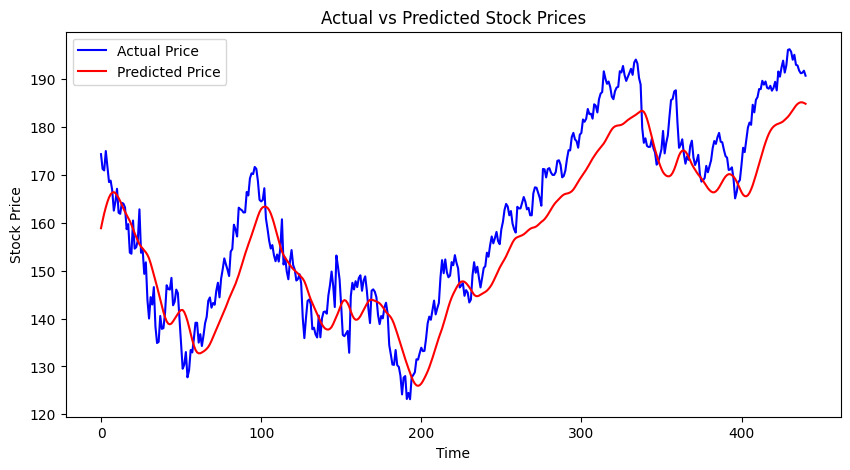

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(actual, color='blue', label='Actual Price')
plt.plot(predictions, color='red', label='Predicted Price')
plt.title("Actual vs Predicted Stock Prices")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend()
plt.show()